<a href="https://colab.research.google.com/github/Marriyam/TEVTA-AI-ML/blob/main/Herbs_data_with_black_white_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab import drive
drive.mount('/content/drive/')
# %cd


Mounted at /content/drive/


In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/ChineseHerbs/ChineseHerbs",
    target_size=(70, 70),
    batch_size=8,
    class_mode='categorical',
    subset='training',
    color_mode='grayscale'
)

validation_generator = train_datagen.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/ChineseHerbs/ChineseHerbs",
    target_size=(70, 70),
    batch_size=8,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale'
)


Found 13098 images belonging to 11 classes.
Found 3268 images belonging to 11 classes.


Images shape: (8, 70, 70, 1)
Labels shape: (8, 11)


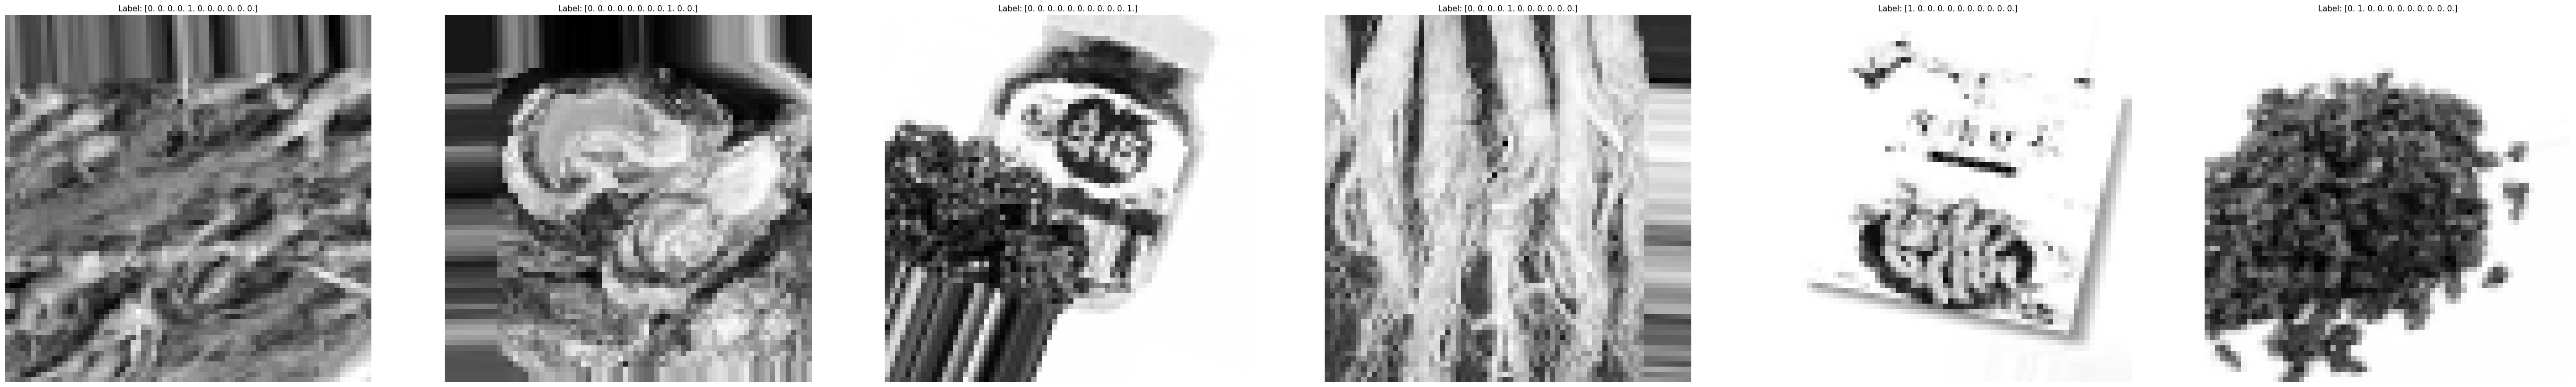

In [ ]:
import matplotlib.pyplot as plt
images, labels = next(train_generator)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
num_images_to_display = 6
plt.figure(figsize=(70, 70))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.show()

In [3]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=80,
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 8162s 5s/step - accuracy: 0.1636 - loss: 2.2261 - val_accuracy: 0.2751 - val_loss: 1.9814
Epoch 2/80
   1/1637 ━━━━━━━━━━━━━━━━━━━━ 2:03 75ms/step - accuracy: 0.5000 - loss: 1.5732

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1637/1637 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.5000 - loss: 1.5732 - val_accuracy: 0.2822 - val_loss: 1.9785
Epoch 3/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 257s 123ms/step - accuracy: 0.3018 - loss: 1.8554 - val_accuracy: 0.3113 - val_loss: 1.8424
Epoch 4/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.6250 - loss: 1.2221 - val_accuracy: 0.3058 - val_loss: 1.8550
Epoch 5/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 219s 122ms/step - accuracy: 0.3537 - loss: 1.7169 - val_accuracy: 0.3526 - val_loss: 1.7657
Epoch 6/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.3750 - loss: 1.3882 - val_accuracy: 0.3407 - val_loss: 1.7803
Epoch 7/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 236s 122ms/step - accuracy: 0.3759 - loss: 1.6543 - val_accuracy: 0.3615 - val_loss: 1.7375
Epoch 8/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5000 - loss: 1.5735 - val_accuracy: 0.3523 - val_loss: 1.7335
Epoch 9/80
1637/1637 ━━━━━━━━━━━━━━━━━━━━ 236s 120ms/step - accuracy: 0.4132 - lo

In [4]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

model.save('simple_cnn_model.h5')

409/409 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.5936 - loss: 1.2065


Validation Loss: 1.2437390089035034
Validation Accuracy: 0.5813953280448914


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/ChineseHerbs_mini",
    target_size=(70, 70),
    batch_size=8,
    class_mode='categorical',
    shuffle=False,
    color_mode='grayscale'
)

#Evaluate the model.
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Found 55 images belonging to 11 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7925 - loss: 0.7288
Test Loss: 0.9092847108840942
Test Accuracy: 0.7272727489471436


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


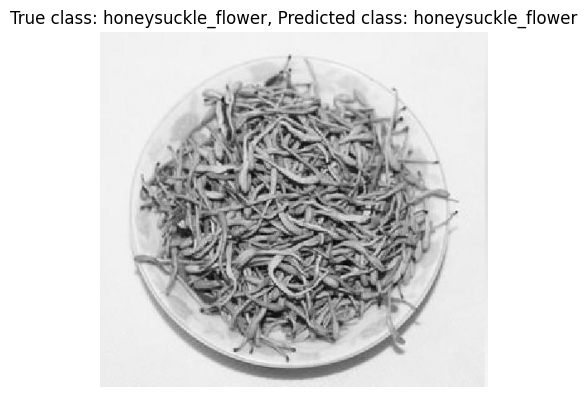

In [9]:
import os
import random
from PIL import Image

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

num_test_images = len(test_generator.filenames)
random_index = random.randint(0, num_test_images - 1)
random_image_path = os.path.join(test_generator.directory, test_generator.filenames[random_index])

img = Image.open(random_image_path).convert('L')

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title(f"True class: {class_labels[true_classes[random_index]]}, Predicted class: {class_labels[predicted_classes[random_index]]}")
plt.axis('off')
plt.show()